In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
positions = np.random.rand(8000,3) * 20
velocity = np.random.rand(8000,3) * 100

In [23]:
def bin_particles(positions, velocities, num_bins):
    # Determine the minimum and maximum values for each axis
    min_values = np.min(positions, axis=0)
    max_values = np.max(positions, axis=0)

    # Calculate the bin size for each axis
    bin_size = (max_values - min_values) / num_bins

    # Create an array to store the mean velocities and bin centers
    mean_velocities = np.zeros((num_bins[0], num_bins[1], num_bins[2], 3))
    bin_centers = np.zeros((num_bins[0], num_bins[1], num_bins[2], 3))

    # Bin the particles and calculate the mean velocity in each bin
    for i in range(num_bins[0]):
        for j in range(num_bins[1]):
            for k in range(num_bins[2]):
                # Define the boundaries of the current bin
                bin_min = min_values + [i * bin_size[0], j * bin_size[1], k * bin_size[2]]
                bin_max = bin_min + bin_size

                # Calculate the center of the current bin
                bin_center = bin_min + 0.5 * bin_size

                # Find the particles within the current bin
                mask = np.all((positions >= bin_min) & (positions < bin_max), axis=1)
                particles_in_bin = velocities[mask]

                # Calculate the mean velocity in the current bin
                mean_velocity = np.mean(particles_in_bin, axis=0)

                # Store the mean velocity and bin center in the corresponding bin
                mean_velocities[i, j, k] = mean_velocity
                bin_centers[i, j, k] = bin_center

    # Reshape the arrays to a (N, 3) shape
    mean_velocities = mean_velocities.reshape(-1, 3)
    bin_centers = bin_centers.reshape(-1, 3)

    # Combine positions and velocities into a single (N, 6) array
    combined_data = np.hstack((bin_centers, mean_velocities))

    return combined_data


In [25]:
R_V_grid = bin_particles(positions, velocity, np.array([20,20,20]))

/Users/suzutsuki-ch/opt/anaconda3/envs/isochrones/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/suzutsuki-ch/opt/anaconda3/envs/isochrones/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [54]:
np.mean(R_V_grid[:,3][np.where(R_V_grid[:,3]>0)])

49.871587648142544

Text(0.5, 0.92, '3D tangential velocity vectors')

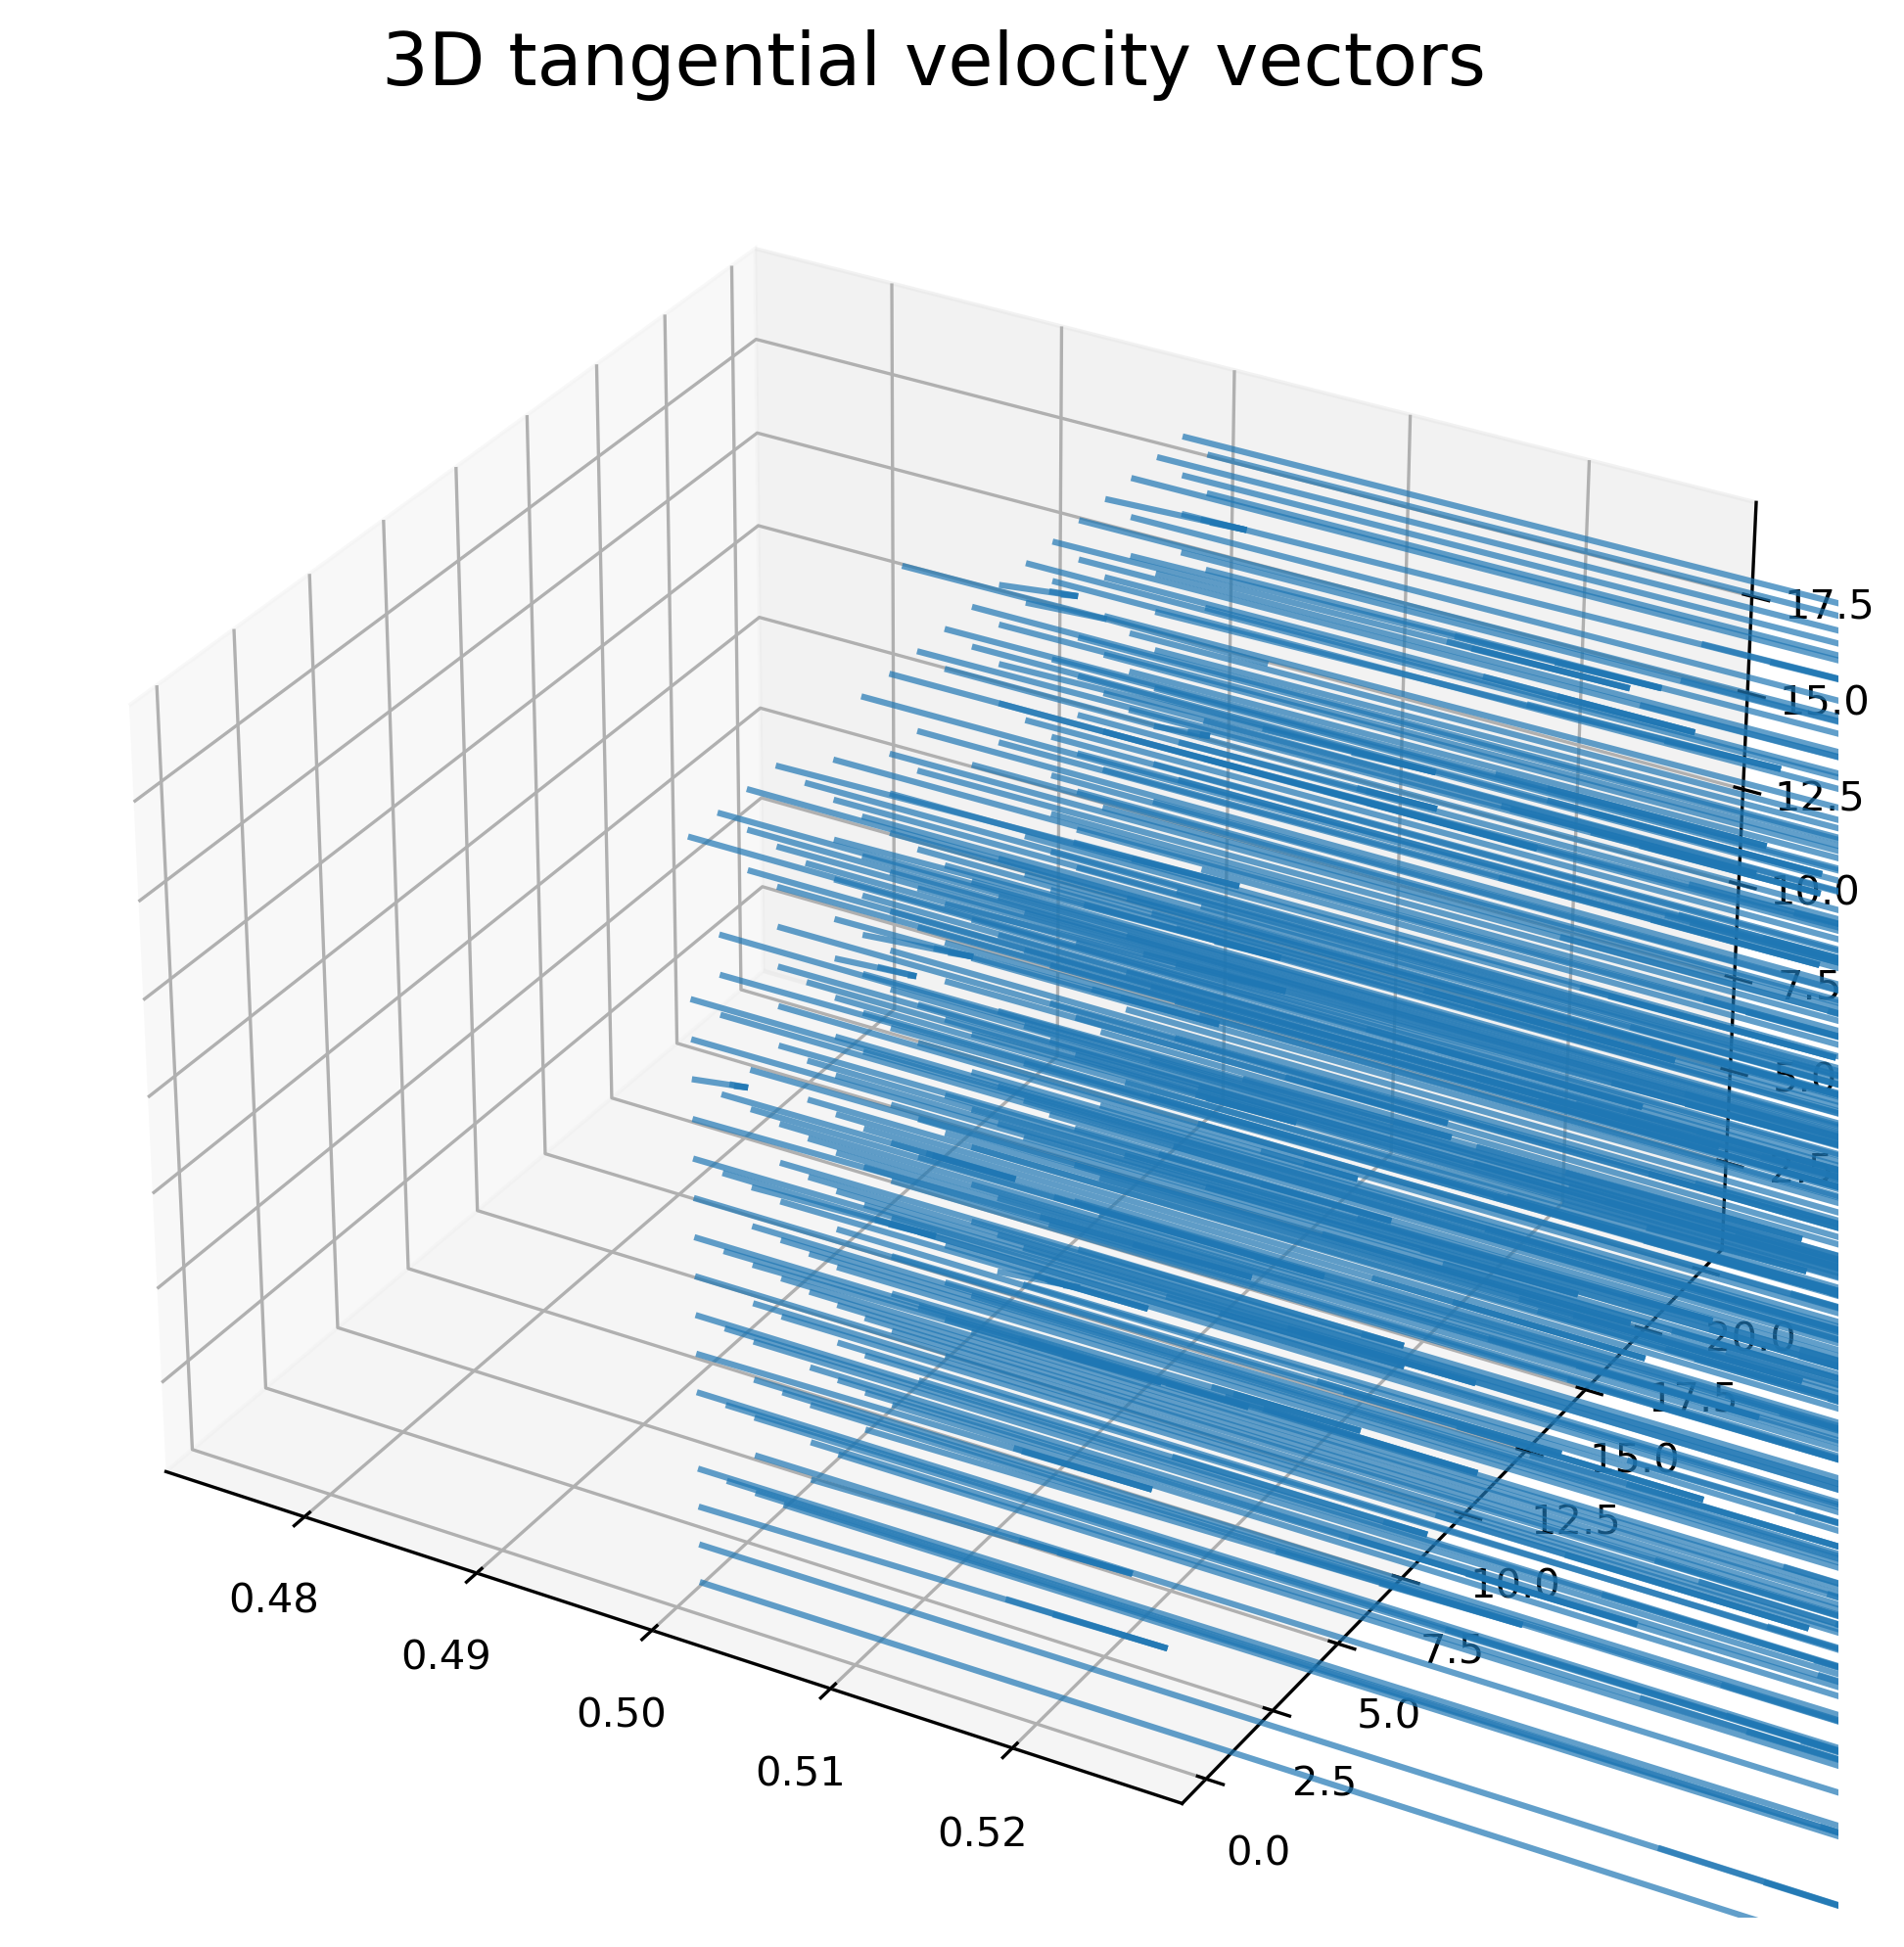

In [48]:
fig = plt.figure(dpi=300, figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.quiver(R_V_grid[:,0][:400], R_V_grid[:,1][:400], R_V_grid[:,2][:400],
          R_V_grid[:,3][:400]/600, R_V_grid[:,4][:400]/600, R_V_grid[:,5][:400]/600, alpha=0.7)


plt.title("3D tangential velocity vectors", fontsize=18)


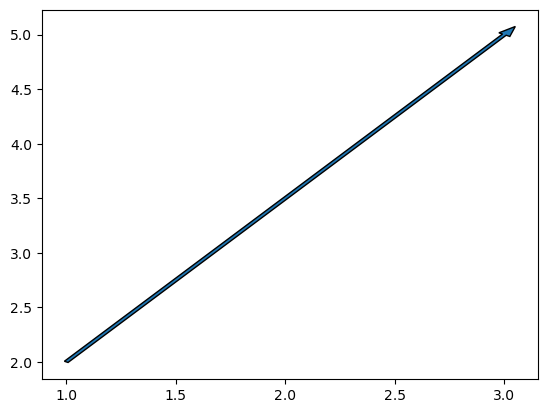

In [60]:
plt.arrow(1,2,2,3, width=0.02)